# Read Data

In [2]:
import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

file_path = '/content/hotel_booking_2022_2024.csv'

data = pd.read_csv(file_path)
data.shape

(119390, 32)

In [3]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2022,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2022-07-01
1,Resort Hotel,0,737,2022,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2022-07-01
2,Resort Hotel,0,7,2022,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2022-07-02
3,Resort Hotel,0,13,2022,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2022-07-02
4,Resort Hotel,0,14,2022,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2022-07-03


# Data Cleaning

In [4]:
data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2023.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2022.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2023.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2023.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2024.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2024.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


## Mô tả sơ lược
Dữ liệu có tổng cộng 119.390 dòng (booking). Một số thống kê quan trọng:
- is_canceled: Tỷ lệ huỷ trung bình là 37.04%
- lead_time: Trung bình là 104 ngày (thời gian từ đặt đến ngày đến)
- adr (Average Daily Rate): Giá phòng trung bình khoảng 101.83
- Một số cột như children, babies, required_car_parking_spaces… có giá trị trung bình gần 0, nghĩa là ít xuất hiện


Nhận định về các cột như previous_cancellations, previous_bookings_not_canceled, booking_changes, days_in_waiting_list, required_car_parking_spaces, total_of_special_requests:

- Chỉ có vài giá trị tối đa, tức chỉ có một số ít booking có giá trị lớn → Chúng chỉ ảnh hưởng đến quyết định huỷ trong một số ít trường hợp.

⸻

Giả định về ảnh hưởng của các đặc trưng (feature impact assumptions):

Ảnh hưởng cao đến việc huỷ:
- hotel
- lead_time
- arrival_date_year, arrival_date_month
- stays_in_weekend_nights, stays_in_week_nights
- is_repeated_guest
- previous_cancellations, previous_bookings_not_canceled
- reserved_room_type, assigned_room_type
- deposit_type
- days_in_waiting_list
- customer_type

Ảnh hưởng trung bình:
- children, babies
- distribution_channel
- booking_changes
- adr

Ảnh hưởng thấp:
- arrival_date_week_number, arrival_date_day_of_month
- country, meal, adults
- market_segment, agent, company
- required_car_parking_spaces, total_of_special_requests
- reservation_status, reservation_status_date

⸻

Các giả định về hành vi huỷ booking:
- Loại khách sạn ảnh hưởng đến tỷ lệ huỷ: city hotel có tỷ lệ huỷ cao hơn resort hotel.
- Booking được đặt sớm (lead_time cao) thì khả năng huỷ cao hơn.
- Booking ở lâu (nhiều đêm) có xu hướng ít huỷ.
- Booking có nhiều trẻ em/babies thì dễ bị huỷ hơn.
- Khách đặt lại (is_repeated_guest = 1) ít có khả năng huỷ.
- Khách có tiền sử huỷ nhiều thì cũng dễ tiếp tục huỷ.
- Nếu phòng được gán khác loại phòng đã đặt, khách có thể huỷ.
- Booking có nhiều chỉnh sửa thì ít có khả năng huỷ do khách đã đầu tư thời gian.
- Booking không đặt cọc hoặc có thể hoàn tiền → dễ bị huỷ hơn.
- Booking phải chờ xác nhận (waiting list) lâu → khách có thể đặt chỗ khác vì mất kiên nhẫn.

⸻

Biến mục tiêu (Target variable):
- is_canceled – là biến cần dự đoán (0 = không huỷ, 1 = huỷ)

# Data Analysis

## Phân tích đơn biến - Univariate Analysis


### Kiểm tra tính hợp lý của giả định liên quan đến việc hủy đặt phòng

Percentage cancelation=  0.37041628277075134
reservation_status
Check-Out    62.958372
Canceled     36.030656
No-Show       1.010972
Name: proportion, dtype: float64


Text(0.5, 1.0, 'Reservation status VS Cancellations')

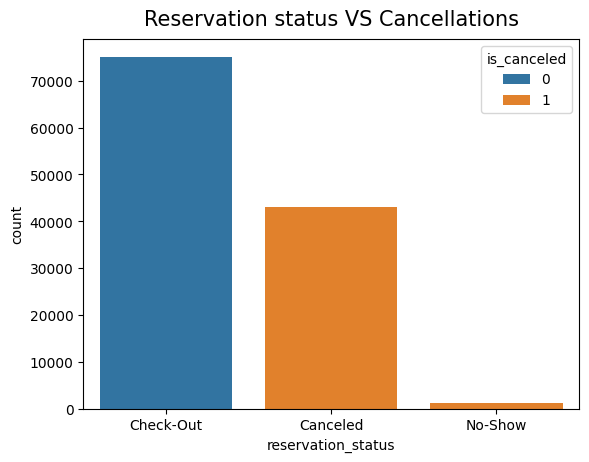

In [5]:
is_can = len(data[data['is_canceled'] == 1])

print("Percentage cancelation= ", is_can / len(data))
cancellation_types = data['reservation_status'].value_counts(normalize = True) * 100
print(cancellation_types)

sns.countplot(data = data, x = 'reservation_status', hue = 'is_canceled')
plt.title("Reservation status VS Cancellations", fontsize = 15, pad = 10)

➤ Kết quả:
- Check-Out: 62.96% → đã đến ở và trả phòng thành công
- Canceled: 36.03% → đã huỷ
- No-Show: 1.01% → không đến, không hủy

⟶ Khá hợp lý so với biến is_canceled (37% tổng số booking bị huỷ, khớp với Canceled + No-Show).

### Phân tích tương quan (correlation) giữa các biến số (numeric features) và biến mục tiêu is_canceled - khả năng huỷ booking.

In [6]:
corr = data.select_dtypes(include=['number']).corr(method='pearson')['is_canceled']
corr.sort_values(ascending = False)

,is_canceled
is_canceled,1.000000
lead_time,0.293123
previous_cancellations,0.110133
adults,0.060017
days_in_waiting_list,0.054186
adr,0.047557
stays_in_week_nights,0.024765
arrival_date_year,0.016660
arrival_date_week_number,0.008148
children,0.005048


Top các biến có tương quan với huỷ booking

Các đặc trưng có tương quan dương cao nhất với việc bị huỷ:
- lead_time (0.293):
→ Booking được đặt càng sớm thì càng dễ bị huỷ. Có thể do khách chỉ “giữ chỗ”, chưa chắc chắn.
- previous_cancellations (0.110):
→ Nếu khách từng huỷ trước đây, họ cũng có khả năng huỷ tiếp.
- adults (0.060):
→ Số người lớn cao hơn có xu hướng huỷ nhiều hơn, nhưng mức tương quan rất thấp.
- days_in_waiting_list (0.054):
→ Khách phải chờ lâu có thể huỷ do mất kiên nhẫn.
- adr – giá phòng trung bình (0.048):
→ Booking có giá phòng cao hơi dễ bị huỷ hơn, nhưng ảnh hưởng nhẹ.

⸻

Các đặc trưng có tương quan âm cao nhất với việc bị huỷ:
- total_of_special_requests (–0.235):
→ Khách có nhiều yêu cầu đặc biệt thường là khách nghiêm túc, ít huỷ.
- required_car_parking_spaces (–0.195):
→ Đặt cả chỗ đậu xe → khách có kế hoạch rõ ràng, khả năng huỷ thấp.
- booking_changes (–0.144):
→ Nếu khách đã điều chỉnh booking nhiều lần, họ thường giữ booking đó, ít huỷ.
- is_repeated_guest (–0.085):
→ Khách quay lại lần sau có xu hướng giữ booking, trung thành hơn.
- agent (–0.083):
→ Booking qua đại lý có vẻ ít bị huỷ hơn booking trực tiếp.

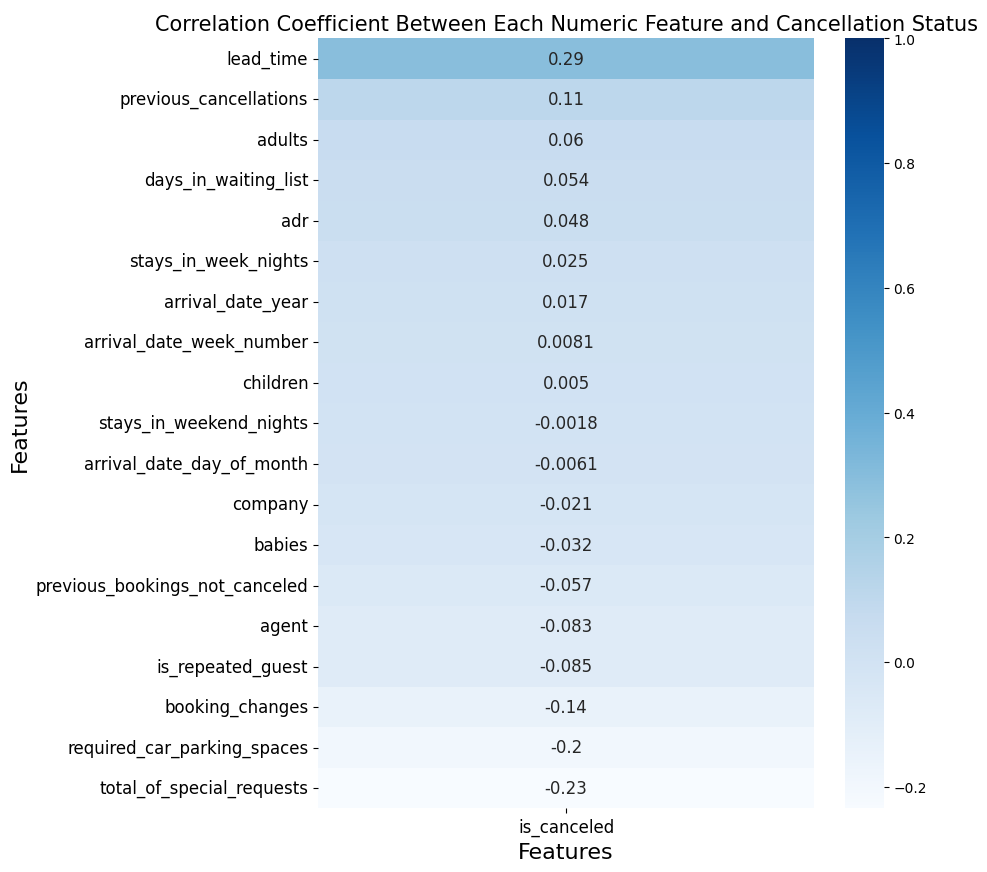

In [7]:
# Visualizing correlation coefficients between features and cancellation:
numeric_data = data.select_dtypes(include=['number'])
corr = numeric_data.corr(method='pearson')['is_canceled']
fig = plt.figure(figsize=(8,10))
# ax = sns.heatmap(data.corr()[['is_canceled']].sort_values('is_canceled', ascending=False), annot = True, annot_kws = {"size":12}, cmap='Blues')
ax = sns.heatmap(corr.sort_values(ascending=False).to_frame(),  # chuyển thành DataFrame 1 cột
                 annot=True,
                 annot_kws={"size": 12},
                 cmap='Blues')
ax.set_title('Correlation Coefficient Between Each Numeric Feature and Cancellation Status', fontsize=15)
ax.set_xlabel('Features', fontsize = 16)
ax.set_ylabel('Features', fontsize = 16)
ax.tick_params(axis = "both", labelsize = 12);
y_min, y_max = ax.get_ylim()
ax.set_ylim(top=y_max+1);

### Phân tích biến hotel (Resort Hotel và City Hotel)

Cancellations in resort hotel=  0.27763354967548676
Cancellations in city hotel=  0.41726963317786464


Text(0.5, 1.0, 'Total count of bookings and cancellations per hotel')

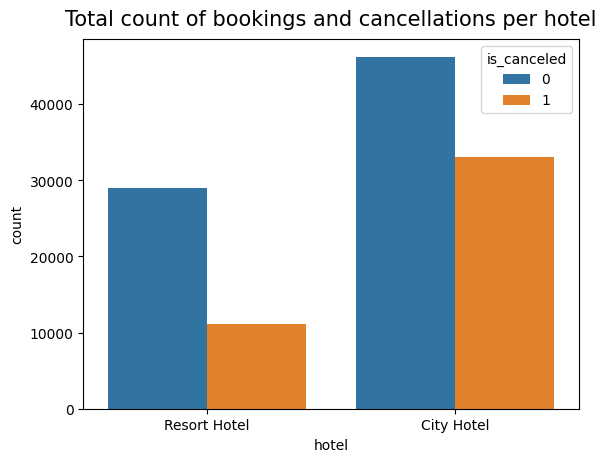

In [8]:
sns.countplot(data = data, x = 'hotel', hue = 'is_canceled')

resort_canceled = data[(data['hotel'] == 'Resort Hotel') & (data['is_canceled'] == 1)]
city_canceled = data[(data['hotel'] == 'City Hotel') & (data['is_canceled'] == 1)]

print('Cancellations in resort hotel= ', (len(resort_canceled)) / (len(data[data['hotel'] == 'Resort Hotel'])))
print('Cancellations in city hotel= ', (len(city_canceled)) / (len(data[data['hotel'] == 'City Hotel'])))

plt.title("Total count of bookings and cancellations per hotel", fontsize = 15, pad = 10)

Phân tích:
City Hotel có tỷ lệ huỷ cao hơn Resort Hotel gần 14%, điều này:
- Ủng hộ giả định trước đó trong dự án:
“City Hotel có nhiều huỷ hơn do đặc thù linh hoạt, ít tiện ích nghỉ dưỡng hơn Resort Hotel.”

### Phân tích biến is_repeated_guest (khách quay lại hay không)

Cancelations among new guests=  0.3778508392455442
Cancelations among old guests=  0.14488188976377953


Text(0.5, 1.0, 'Total count of is repeated guest')

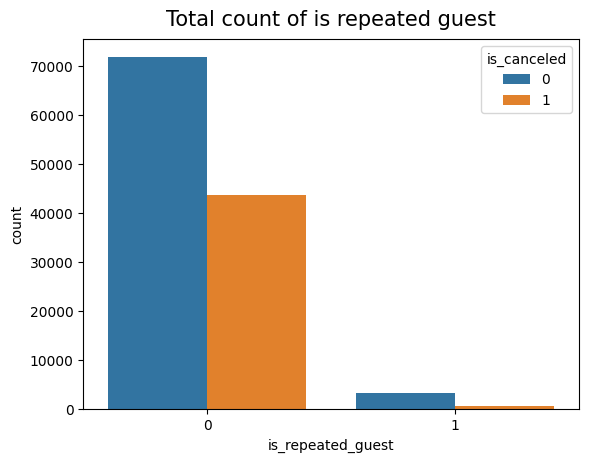

In [9]:
sns.countplot(data = data, x ='is_repeated_guest', hue ='is_canceled')

new_guest = data[(data['is_repeated_guest'] == 0) & (data['is_canceled']==1)]
old_guest = data[(data['is_repeated_guest'] == 1) & (data['is_canceled']==1)]

print('Cancelations among new guests= ', (len(new_guest)) / (len(data[data['is_repeated_guest'] == 0])))
print('Cancelations among old guests= ', (len(old_guest)) / (len(data[data['is_repeated_guest'] == 1])))

plt.title("Total count of is repeated guest", fontsize = 15, pad = 10)

Phân tích:
- Khách quay lại nhiều lần (repeated guests) có tỷ lệ hủy rất thấp → tín hiệu mạnh để giữ lại biến này
- Khách mới chiếm phần lớn và là nguồn chính gây huỷ → nên ưu tiên chăm sóc hoặc sàng lọc

### Phân tích biến previous_cancellations (số lần huỷ trước đó)

Text(0.5, 1.0, 'Total count of previous cancellations')

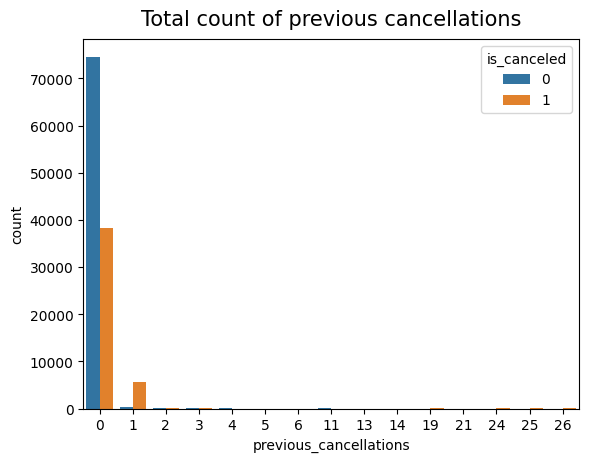

In [10]:
sns.countplot(data = data, x='previous_cancellations', hue='is_canceled')
plt.title("Total count of previous cancellations", fontsize = 15, pad = 10)

Phân tích:

- Đa số khách hàng chưa từng huỷ trước đó. Họ ít có khả năng huỷ booking hiện tại.

- Tuy nhiên, những khách đã từng huỷ ít nhất 1 lần trước đó lại có xu hướng huỷ booking hiện tại cao hơn.

Điều này cũng khớp với hệ số tương quan dương giữa previous_cancellations và is_canceled

### Phân tích tương quan reserved_room_type, assigned_room_type

In [11]:
temp = data.loc[data['reserved_room_type'] != data['assigned_room_type']]
temp['is_canceled'].value_counts(normalize=True) * 100

,proportion
is_canceled,
0,94.623584
1,5.376416


Phân tích:
- Chỉ khoảng 5.38% khách huỷ booking trong trường hợp loại phòng được giao không trùng với loại phòng họ đặt.
- Điều này phủ nhận rằng sự khác biệt giữa loại phòng đặt và loại phòng nhận là nguyên nhân lớn dẫn đến huỷ.

Ngược lại: Phần lớn khách vẫn tiếp tục ở, ngay cả khi bị đổi loại phòng.

### Phân tích biến booking_changes

Text(0.5, 1.0, 'Booking Changes VS Cancellations')

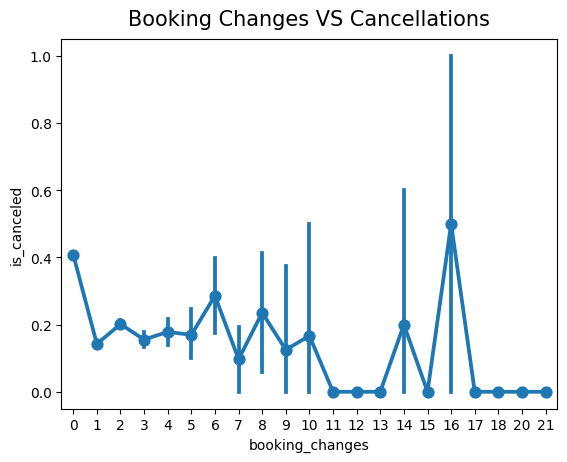

In [12]:
sns.pointplot(data = data, x = 'booking_changes', y = 'is_canceled')
plt.title("Booking Changes VS Cancellations", fontsize = 15, pad = 10)

Phân tích:
- Việc số lần thay đổi booking tăng lên không đồng nghĩa với khả năng huỷ tăng hoặc giảm một cách nhất quán.
- Đường biểu diễn dao động thất thường hoặc rất phẳng → không có mô hình tuyến tính rõ ràng.

### Phân tích biến deposit_type

Text(0.5, 1.0, 'Cancellation VS Deposit type')

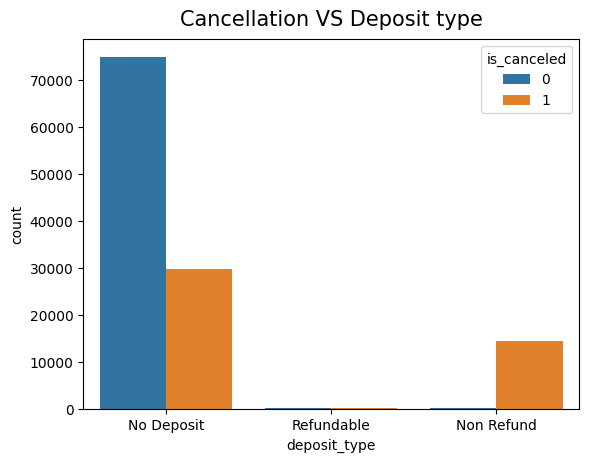

In [13]:
sns.countplot(x = "deposit_type", hue = "is_canceled", data = data);
plt.title("Cancellation VS Deposit type", fontsize = 15, pad = 10)

Phân tích
Mặc dù ta giả định rằng khách sẽ ít huỷ hơn khi đặt phòng không hoàn tiền, nhưng dữ liệu cho thấy vẫn có nhiều huỷ xảy ra với các booking loại này.
Điều này nghĩa là: Khách hàng vẫn có thể huỷ dù biết sẽ mất tiền, có thể vì:
- Bị ràng buộc thay đổi kế hoạch
- Không đọc kỹ điều khoản hoàn tiền
- Hoặc không quan tâm đến chi phí mất


### Phân tích biến days_in_waiting_list

Text(0.5, 1.0, 'Days in waiting VS cancellations')

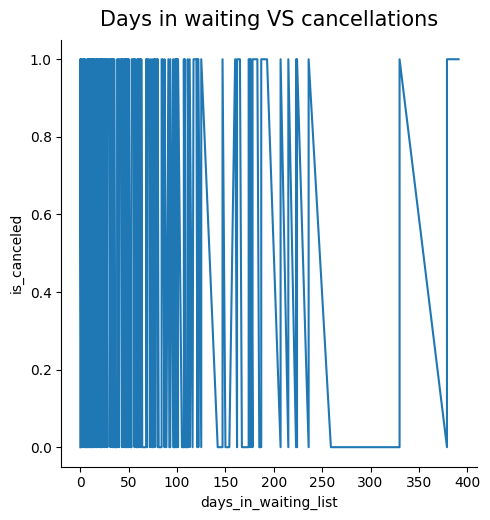

In [14]:
sns.relplot(data = data, x ='days_in_waiting_list', y = 'is_canceled', kind = 'line', estimator = None)
plt.title("Days in waiting VS cancellations", fontsize = 15, pad = 10)

Phân tích:
Biểu đồ không cho thấy xu hướng rõ ràng nào giữa số ngày khách phải chờ và khả năng bị huỷ phòng.
→ Không thể khẳng định là chờ lâu thì dễ huỷ hơn hay ngược lại.

### Phân tích biến arrival_date_month

In [15]:
max_bookings = data.groupby(['arrival_date_month'])['is_canceled'].count().sort_values(ascending = False)
print(max_bookings)

arrival_date_month
August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
December      6780
January       5929
Name: is_canceled, dtype: int64


Tháng 7 và 8 là thời điểm có lượng booking cao nhất trong năm, trùng với mùa du lịch.

Text(0.5, 1.0, 'Total Number of bookings per month')

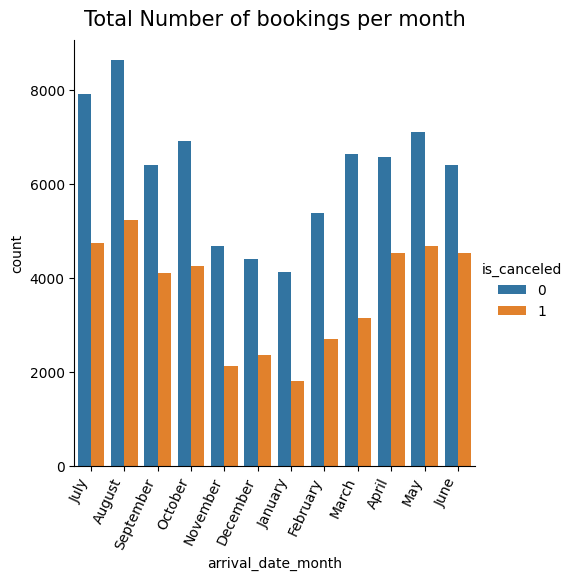

In [16]:
chart = sns.catplot(data = data, x = 'arrival_date_month', hue = 'is_canceled', kind = 'count')
chart.set_xticklabels(rotation = 65, horizontalalignment = 'right')
plt.title("Total Number of bookings per month", fontsize = 15, pad = 10)

In [17]:
month_count = data.groupby(['arrival_date_month', 'is_canceled']).size().to_frame(name = 'count')
month_perct = month_count.groupby(level = 0).apply(lambda x:100 * x / float(x.sum()))
print(month_perct)
# month_perct.plot(kind='bar')

                                                       count
arrival_date_month arrival_date_month is_canceled           
April              April              0            59.202814
                                      1            40.797186
August             August             0            62.246883
                                      1            37.753117
December           December           0            65.029499
                                      1            34.970501
February           February           0            66.584036
                                      1            33.415964
January            January            0            69.522685
                                      1            30.477315
July               July               0            62.546402
                                      1            37.453598
June               June               0            58.542828
                                      1            41.457172
March              March

/tmp/ipython-input-17-1866901863.py:2: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  month_perct = month_count.groupby(level = 0).apply(lambda x:100 * x / float(x.sum()))


Phân tích:
- April và June có tỷ lệ huỷ cao nhất (~41%)
- Ngược lại, January và November có tỷ lệ huỷ thấp nhất
Nên cảnh báo hoặc kiểm soát kỹ hơn các booking trong tháng 4–6


### Phân tích biến market_segment

Text(0.5, 1.0, 'Total cancellations acorss market segment')

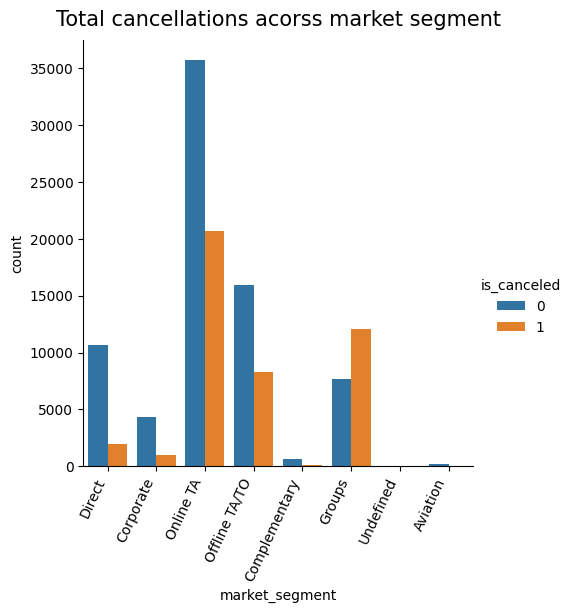

In [18]:
chart = sns.catplot(data = data, x = 'market_segment', kind = 'count', hue = 'is_canceled')
chart.set_xticklabels(rotation = 65, horizontalalignment = 'right')
plt.title("Total cancellations acorss market segment", fontsize = 15, pad = 10)

Phân tích:
- Có một số phân khúc (như Online TA) huỷ nhiều hơn


### Phân tích biến distribution_channel

Text(0.5, 1.0, 'Distribution of cancellations in various channels')

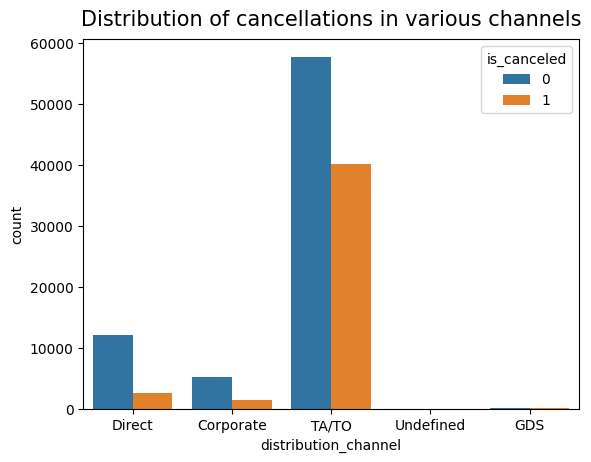

In [19]:
sns.countplot(data = data, x = 'distribution_channel', hue = 'is_canceled')
plt.title("Distribution of cancellations in various channels", fontsize = 15, pad = 10)

Phân tích:
- Một số kênh (như TA/TO) dẫn đến huỷ nhiều


### Phân tích biến customer_type

customer_type
Transient          75.059050
Transient-Party    21.043638
Contract            3.414021
Group               0.483290
Name: proportion, dtype: float64


Text(0.5, 1.0, 'Average Number of cancellations in each category')

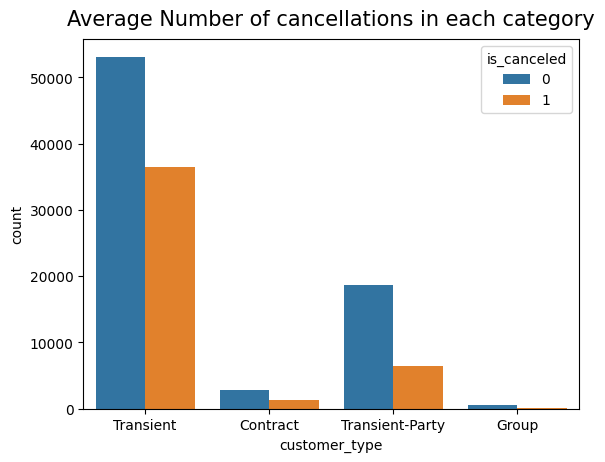

In [20]:
print(data['customer_type'].value_counts(normalize = True) * 100)
sns.countplot(data = data, x = 'customer_type', hue = 'is_canceled')
plt.title("Average Number of cancellations in each category", fontsize = 15, pad = 10)

Nhóm Transient chiếm đa số và có tỷ lệ huỷ cao nh


### Phân tích biến lead_time

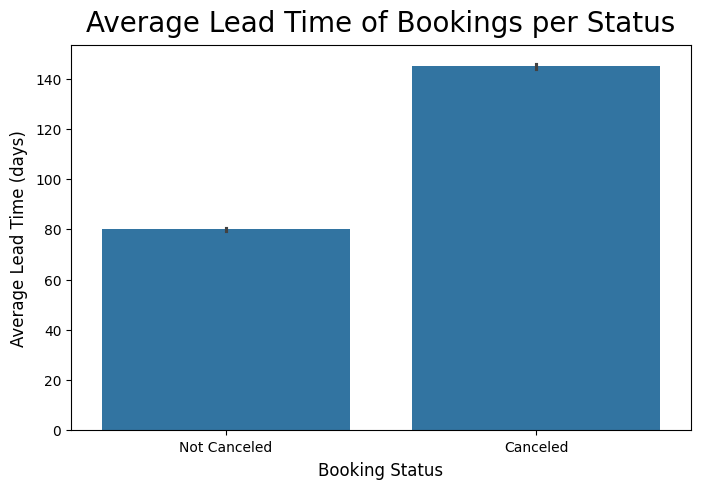

In [21]:
# Visualizing the average lead time for canceled and not canceled bookings:
plt.figure(figsize=(8,5))
plt.title("Average Lead Time of Bookings per Status", fontsize = 20, pad = 10)
sns.barplot(x=data['is_canceled'], y=data['lead_time'])
plt.xlabel("Booking Status", fontsize = 12, labelpad = 5)
plt.ylabel("Average Lead Time (days)", fontsize = 12, labelpad = 5)
plt.xticks(ticks=[0, 1], labels=['Not Canceled', 'Canceled']);

Phân tích:
- Phần lớn các huỷ phòng xảy ra khi đặt trước từ 60–70 ngày. Càng đặt sớm thì khả năng huỷ càng cao, nhưng sau mốc đó thì lại giảm dần.
- Điều này phản bác lại giả định số 2: “Đặt càng sớm càng dễ huỷ.”

### Phân tích biến total_of_special_requests

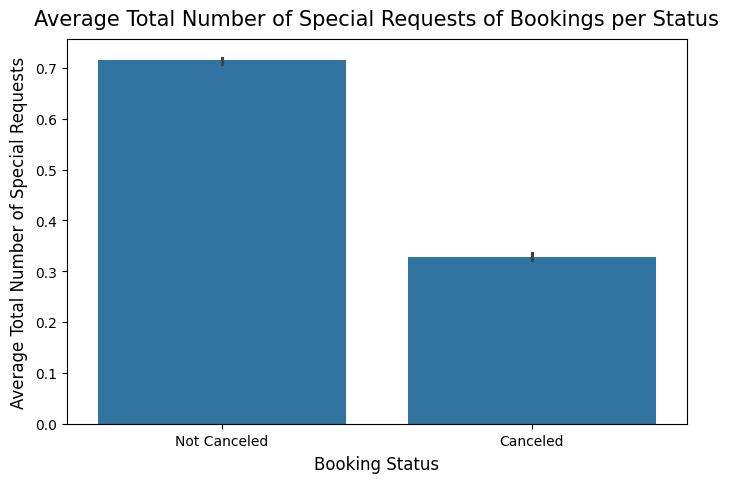

In [22]:
# Visualizing the total number of special requests for canceled and not canceled bookings:
plt.figure(figsize=(8,5))
plt.title("Average Total Number of Special Requests of Bookings per Status", fontsize = 15, pad = 10)
sns.barplot(x=data['is_canceled'], y=data['total_of_special_requests'])
plt.xlabel("Booking Status", fontsize = 12, labelpad = 5)
plt.ylabel("Average Total Number of Special Requests", fontsize = 12, labelpad = 5)
plt.xticks(ticks=[0, 1], labels=['Not Canceled', 'Canceled']);

Phân tích:
- Khách không huỷ thường có nhiều yêu cầu đặc biệt hơn.
→ Điều này cho thấy mức độ tương tác cao hơn với khách sạn (ví dụ yêu cầu phòng đặc biệt, dịch vụ kèm theo), khiến họ cam kết hơn và ít huỷ hơn.

### Phân tích biến required_car_parking_spaces

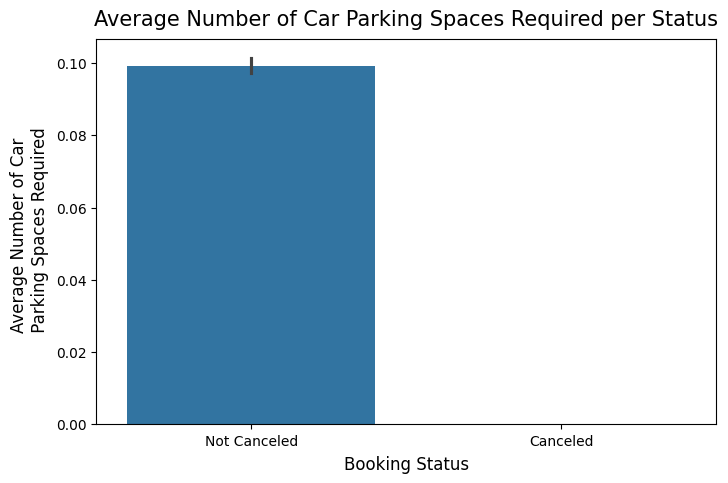

In [23]:
plt.figure(figsize=(8,5))
plt.title("Average Number of Car Parking Spaces Required per Status", fontsize = 15, pad = 10)
sns.barplot(x=data['is_canceled'], y=data['required_car_parking_spaces'])
plt.xlabel("Booking Status", fontsize = 12, labelpad = 5)
plt.ylabel("Average Number of Car \n Parking Spaces Required", fontsize = 12, labelpad = 5)
plt.xticks(ticks=[0, 1], labels=['Not Canceled', 'Canceled']);

Phân tích:
Những khách cần chỗ đậu xe ít khi huỷ hơn.
- Họ có xu hướng lên kế hoạch cụ thể, thể hiện sự cam kết cao.
- Có thể do ít khách sạn có chỗ đậu xe, nên khi đã đặt được là họ giữ.

Gợi ý: Tăng số lượng chỗ đậu xe có thể giảm tỷ lệ huỷ.

### Phân tích biến reserved_room_type

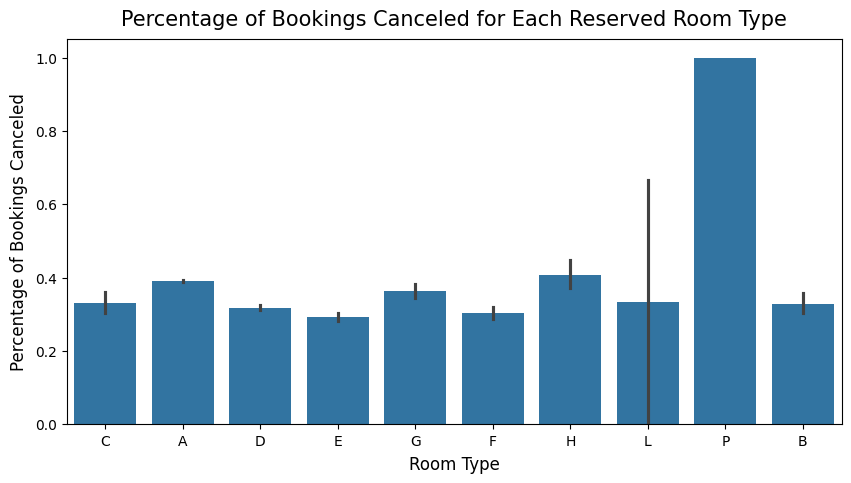

In [24]:
# Visualizing percentage of bookings canceled for each room type:
plt.figure(figsize=(10,5))
plt.title("Percentage of Bookings Canceled for Each Reserved Room Type", fontsize = 15, pad = 10)
sns.barplot(x=data['reserved_room_type'], y=data['is_canceled'])
plt.xlabel("Room Type", fontsize = 12, labelpad = 5)
plt.ylabel("Percentage of Bookings Canceled", fontsize = 12, labelpad = 5);

Phân tích:

Phòng loại P có tỷ lệ huỷ 100% – tất cả booking bị huỷ.

Tuy nhiên, không rõ đây là loại phòng gì do dữ liệu được ẩn danh, nên cần kiểm tra kỹ hơn với khách sạn để tìm nguyên nhân.

### Phân tích biến deposit_type

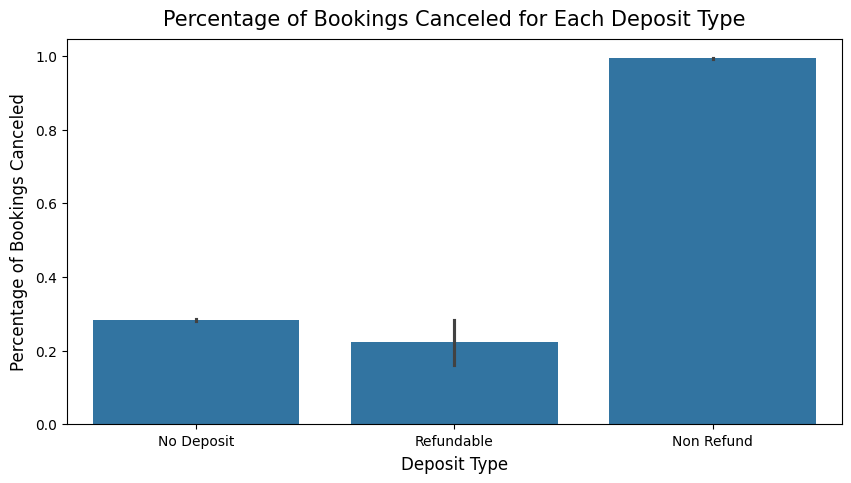

In [25]:
# Visualizing percentage of bookings canceled for each deposit type:
plt.figure(figsize=(10,5))
plt.title("Percentage of Bookings Canceled for Each Deposit Type", fontsize = 15, pad = 10)
sns.barplot(x=data['deposit_type'], y=data['is_canceled'])
plt.xlabel("Deposit Type", fontsize = 12, labelpad = 5)
plt.ylabel("Percentage of Bookings Canceled", fontsize = 12, labelpad = 5);

Phân tích:

- Khách đặt cọc không hoàn lại (non-refundable) lại có tỷ lệ huỷ cao nhất, trái với dự đoán.
- Đây là điểm bất thường – cần phân tích kỹ hơn các đặc điểm của nhóm đặt cọc kiểu này để hiểu rõ lý do. Có thể liên quan đến chính sách khách sạn, hoặc lỗi nhập liệu.

## Phân tích đa biến - Multivatiate Analysis

1. Đặt phòng theo loại khách sạn qua các năm

Nhận định:

Trong cả ba năm (2015–2017), số lượng đặt phòng tại City Hotel luôn cao hơn Resort Hotel.

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


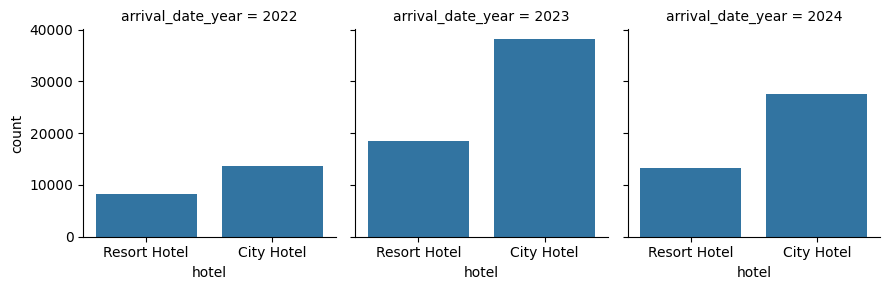

In [26]:
grid = sns.FacetGrid(data, col='arrival_date_year')
grid.map(sns.countplot, 'hotel')

2. Loại bữa ăn theo từng loại khách hàng

Nhận định:

Tất cả các nhóm khách hàng đều ưu tiên chọn loại bữa sáng (BB).

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


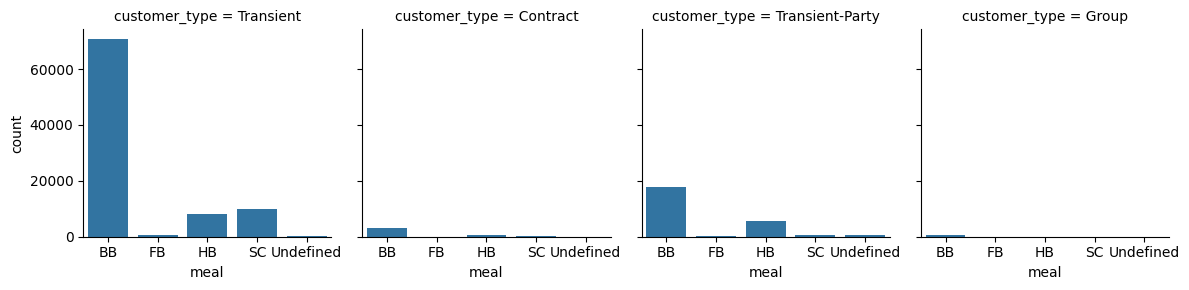

In [27]:
data['meal'].nunique(), data['customer_type'].nunique()
grid = sns.FacetGrid(data, col = 'customer_type')
grid.map(sns.countplot, 'meal')

3. Quốc tịch phổ biến nhất

Nhận định:

Khách đến từ quốc gia có mã PRT (Bồ Đào Nha) là đông nhất cho cả hai loại khách sạn.

In [28]:
data.pivot_table(columns='hotel', values='country', aggfunc=lambda x:x.mode())

hotel,City Hotel,Resort Hotel
country,PRT,PRT


4. Loại phòng được đặt theo khách sạn

Nhận định:
- Resort Hotel: khách thích phòng loại A, D, E.
- City Hotel: khách thích phòng loại A, D, F.


Text(0.5, 1.0, 'Reversed room type booked VS Hotel')

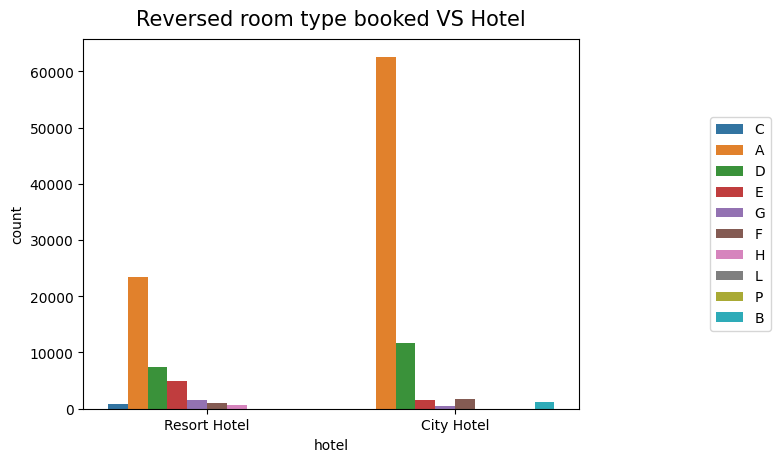

In [29]:
g = sns.countplot(data = data, x = 'hotel', hue = 'reserved_room_type')
g.legend(loc = 'center left', bbox_to_anchor = (1.25, 0.5), ncol = 1)
plt.title("Reversed room type booked VS Hotel", fontsize = 15, pad = 10)

 5. Loại khách hàng phổ biến theo khách sạn

 Nhận định:
- Khách hàng dạng Transient (ngắn ngày) chiếm tỷ lệ cao nhất.
- Kế tiếp là Transient-Party (nhóm khách vãng lai).
- Group (đoàn) chiếm tỷ lệ thấp nhất.


In [30]:
print(data.groupby(['hotel', 'customer_type']).size())

hotel         customer_type  
City Hotel    Contract            2300
              Group                293
              Transient          59404
              Transient-Party    17333
Resort Hotel  Contract            1776
              Group                284
              Transient          30209
              Transient-Party     7791
dtype: int64


6. Kiểu đặt cọc theo loại khách hàng

Nhận định:
- Phần lớn các khách không đặt cọc.
- Tuy nhiên, giữa refundable và non-refundable, nhiều người chọn non-refundable hơn, điều này khá bất ngờ.

In [31]:
print(data.groupby(['customer_type', 'deposit_type']).size())

customer_type    deposit_type
Contract         No Deposit       3530
                 Non Refund        544
                 Refundable          2
Group            No Deposit        569
                 Refundable          8
Transient        No Deposit      76684
                 Non Refund      12909
                 Refundable         20
Transient-Party  No Deposit      23858
                 Non Refund       1134
                 Refundable        132
dtype: int64


7. Kênh phân phối theo loại khách hàng

Nhận định:
- TA/TO (Travel Agent/Tour Operator) là kênh phổ biến nhất với mọi loại khách.
- Transient cũng sử dụng nhiều kênh Direct và Corporate.


In [32]:
print(data.groupby(['customer_type', 'distribution_channel']).size())

customer_type    distribution_channel
Contract         Corporate                  27
                 Direct                     19
                 TA/TO                    4030
Group            Corporate                  31
                 Direct                    116
                 TA/TO                     430
Transient        Corporate                4157
                 Direct                  12343
                 GDS                       193
                 TA/TO                   72919
                 Undefined                   1
Transient-Party  Corporate                2462
                 Direct                   2167
                 TA/TO                   20491
                 Undefined                   4
dtype: int64


 8. Phân khúc thị trường theo loại khách hàng

Nhận định:
- Online TA là phân khúc lớn nhất, đặc biệt cho khách Transient.
- Group chủ yếu đặt qua nhóm Groups.
- Có một số ít sử dụng kênh như Aviation và Complementary.


In [33]:
print(data.groupby(['customer_type', 'market_segment']).size())

customer_type    market_segment
Contract         Complementary         2
                 Corporate            22
                 Direct               14
                 Groups              735
                 Offline TA/TO      1817
                 Online TA          1486
Group            Aviation              2
                 Complementary         6
                 Corporate            29
                 Direct              134
                 Groups               16
                 Offline TA/TO       211
                 Online TA           179
Transient        Aviation            218
                 Complementary       703
                 Corporate          3576
                 Direct            11336
                 Groups             8427
                 Offline TA/TO     14054
                 Online TA         51299
Transient-Party  Aviation             17
                 Complementary        32
                 Corporate          1668
                 Direct  

9. Kênh phân phối & phân khúc thị trường theo khách sạn

Nhận định:
- City Hotel dùng nhiều TA/TO hơn Resort Hotel.
- Market Segment chính ở City Hotel là Online TA, sau đó đến Offline TA/TO và Groups.

In [34]:
data.groupby(['hotel', 'distribution_channel']).size()

hotel         distribution_channel
City Hotel    Corporate                3408
              Direct                   6780
              GDS                       193
              TA/TO                   68945
              Undefined                   4
Resort Hotel  Corporate                3269
              Direct                   7865
              TA/TO                   28925
              Undefined                   1
dtype: int64

In [35]:
data.groupby(['hotel', 'market_segment']).size()

hotel         market_segment
City Hotel    Aviation            237
              Complementary       542
              Corporate          2986
              Direct             6093
              Groups            13975
              Offline TA/TO     16747
              Online TA         38748
              Undefined             2
Resort Hotel  Complementary       201
              Corporate          2309
              Direct             6513
              Groups             5836
              Offline TA/TO      7472
              Online TA         17729
dtype: int64

10. Tỷ lệ huỷ theo loại khách hàng

Nhận định:
- Khách Transient có tỷ lệ huỷ cao nhất (~39.7%).
- Group có tỷ lệ huỷ thấp nhất (~9.5%).


In [36]:
group = data.groupby(['customer_type', 'reservation_status']).size()
group_pcts = group.groupby(level = 0).apply(lambda x:100 * x / float(x.sum()))
group_pcts

customer_type    customer_type    reservation_status
Contract         Contract         Canceled              30.323847
                                  Check-Out             69.038273
                                  No-Show                0.637880
Group            Group            Canceled               9.532062
                                  Check-Out             89.774697
                                  No-Show                0.693241
Transient        Transient        Canceled              39.678395
                                  Check-Out             59.253680
                                  No-Show                1.067925
Transient-Party  Transient-Party  Canceled              24.554211
                                  Check-Out             74.570132
                                  No-Show                0.875657
dtype: float64

12. Tổng số yêu cầu đặc biệt theo khách sạn


Nhận định:
- City Hotel: 43,387 yêu cầu đặc biệt
- Resort Hotel: 24,828 yêu cầu đặc biệt

Gợi ý: City Hotel có khách hàng yêu cầu nhiều hơn → cần hệ thống phục vụ tốt hơn.

In [37]:
data.pivot_table(columns='hotel', values='total_of_special_requests')

hotel,City Hotel,Resort Hotel
total_of_special_requests,0.546918,0.61977


 13. Ngày chờ phòng theo khách sạn

 Khách ở City Hotel phải chờ lâu hơn (có thời gian chờ cao hơn), cho thấy nhu cầu cao hơn.

Text(0.5, 1.0, 'Days in waiting VS Hotel')

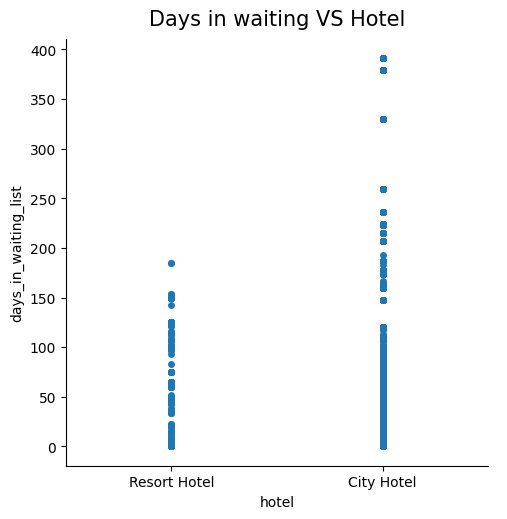

In [38]:
sns.catplot(data = data, x = 'hotel', y = 'days_in_waiting_list', jitter = False)
plt.title("Days in waiting VS Hotel", fontsize = 15, pad = 10)

14. Top 5 quốc gia và kênh phân phối

Nhận định:

Dựa trên các quốc gia có lượng khách hàng cao nhất, khách sạn có thể điều chỉnh chiến lược quảng bá theo từng thị trường quốc gia cụ thể.

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


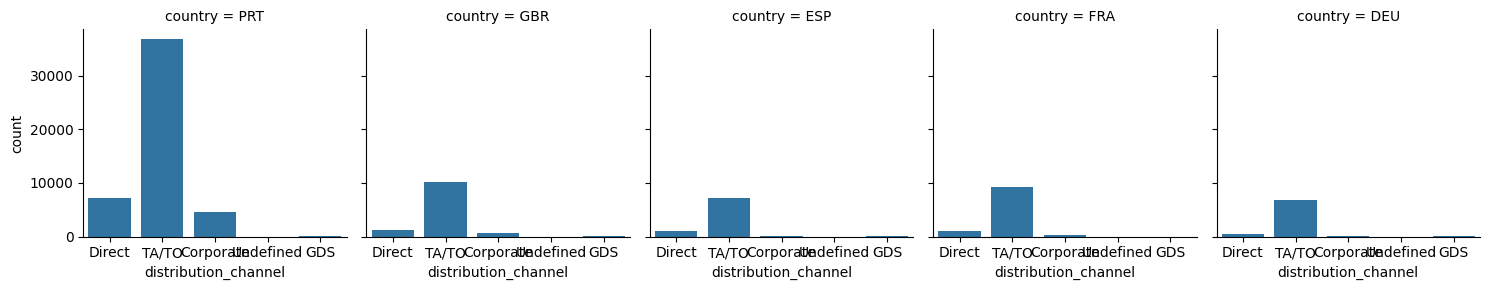

In [39]:
temp = data[data['country'].isin(['PRT', 'GBR', 'FRA', 'ESP', 'DEU'])]
grid = sns.FacetGrid(temp, col = 'country')
grid.map(sns.countplot, 'distribution_channel')

15. Yêu cầu đặc biệt theo loại khách hàng


Nhận định:

Khách Contract và Transient-Party có xu hướng yêu cầu nhiều hơn các nhóm còn lại.

<Axes: xlabel='customer_type', ylabel='total_of_special_requests'>

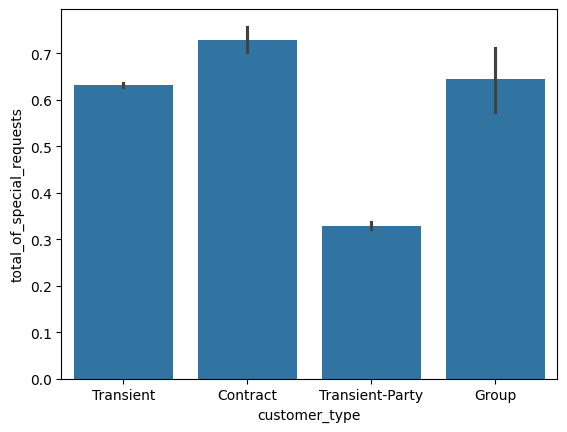

In [40]:
sns.barplot(data = data, x = 'customer_type', y = 'total_of_special_requests')

16. Thời gian đặt trước theo kênh phân phối

Nhận định:

Kênh TA/TO thường có lead time (đặt trước) dài hơn, nghĩa là khách lên kế hoạch sớm hơn qua đại lý.

<Axes: xlabel='distribution_channel', ylabel='lead_time'>

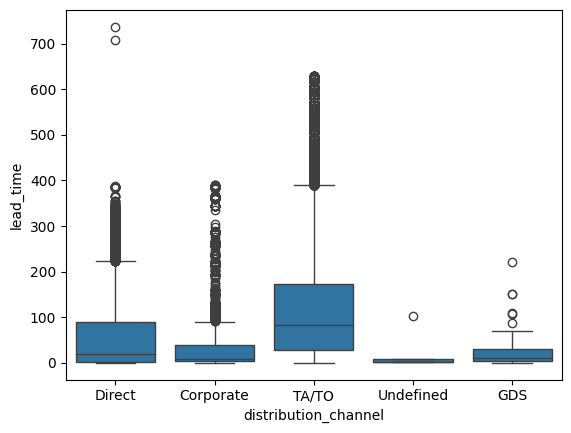

In [41]:
sns.boxplot(data=data, x='distribution_channel', y='lead_time')

## Tóm Tắt Phân Tích Dữ Liệu Đặt Phòng Khách Sạn

### 1. Phân bố theo năm và loại khách sạn
- **City Hotel** có số lượng đặt phòng cao hơn **Resort Hotel** trong cả ba năm 2015, 2016, 2017.
- Năm **2016** ghi nhận nhiều đơn đặt nhất, nhưng **tỷ lệ huỷ cao hơn ở năm 2015 và 2017**.

### 2. Loại bữa ăn phổ biến
- Phần lớn khách hàng (mọi phân khúc) **ưa thích loại bữa sáng (BB)**.

### 3. Quốc gia đặt phòng nhiều nhất
- Khách hàng từ **Bồ Đào Nha (PRT)** chiếm tỷ lệ cao nhất cho cả hai loại khách sạn.

### 4. Loại phòng được đặt nhiều
- **Resort Hotel**: Phòng loại A, D, E phổ biến.
- **City Hotel**: Phòng loại A, D, F phổ biến.

### 5. Loại khách hàng chính
- **Transient** chiếm tỷ lệ lớn nhất.
- Tiếp theo là **Transient-Party**.
- **Group** là loại ít phổ biến nhất.

### 6. Hình thức đặt cọc
- Đa số khách **không đặt cọc**.
- Trong nhóm đặt cọc, **non-refundable** được chọn nhiều hơn **refundable**, điều này gây bất ngờ.

### 7. Kênh phân phối
- **TA/TO (Travel Agent/Tour Operator)** là kênh chính ở mọi nhóm khách.
- Kênh **Direct** và **Corporate** cũng được Transient sử dụng nhiều.

### 8. Phân khúc thị trường
- **Online TA** là kênh phổ biến nhất.
- Khách nhóm (Group) sử dụng phân khúc **Groups**.
- Một số ít đến từ kênh **Aviation** hoặc **Complementary**.

### 9. Tỷ lệ huỷ theo loại khách hàng
- **Transient**: tỷ lệ huỷ cao nhất (~39.7%).
- **Group**: thấp nhất (~9.5%).
- **Contract** và **Transient-Party** ở mức trung bình.

### 10. Thời gian lưu trú và yêu cầu đặc biệt
- City Hotel có tổng số đêm ở cao hơn.
- Khách City Hotel cũng đưa ra **nhiều yêu cầu đặc biệt hơn** Resort Hotel.

### 11. Thời gian chờ (waiting list)
- **City Hotel** có thời gian chờ dài hơn đáng kể, cho thấy **nhu cầu cao hơn**.

### 12. Top 5 quốc gia đặt phòng
- **PRT, GBR, FRA, ESP, DEU** là những quốc gia dẫn đầu.
- Có thể triển khai **chiến lược tiếp thị riêng** cho từng quốc gia này.

### 13. Số yêu cầu đặc biệt theo loại khách
- **Contract** và **Transient-Party** đưa ra nhiều yêu cầu đặc biệt hơn.

### 14. Lead Time theo kênh phân phối
- Khách từ kênh **TA/TO** có xu hướng đặt trước từ rất sớm.

---

### Gợi ý chiến lược từ kết quả phân tích:

- **Tập trung quảng bá cho nhóm Transient tại các quốc gia top đầu**.
- **Tối ưu hoá kênh TA/TO và Online TA**, đặc biệt là với City Hotel.
- **Đầu tư vào bữa sáng BB và phòng loại A, D** để tăng sự hài lòng.
- **Tăng lượng phòng có chỗ đậu xe và xử lý yêu cầu đặc biệt** – những yếu tố giúp **giảm tỷ lệ huỷ**.

## Classification


### 1. Feature Engineering
Biến đổi dữ liệu gốc thành dạng phù hợp với mô hình học máy

- Tạo thêm cột change_in_room, stay_duration, offspring…
- Mã hoá biến phân loại (LabelEncoder, One-hot encoding)
- Xử lý dữ liệu thiếu

In [43]:

month_map = {'January':'01', 'February':'02', 'March':'03', 'April':'04', 'May':'05', 'June':'06', 'July':'07', 'August':'08', 'September':'09', 'October':'10', 'November':'11', 'December':'12'}
data['arrival_date_month'].isna().sum()
data['arrival_date_month'] = data['arrival_date_month'].map(month_map)
data['arrival_date_month'] = data['arrival_date_month'].fillna('01').astype(int)

data['arrival_date'] = data['arrival_date_year'].astype(str)+'-'+data['arrival_date_month'].astype(str)+'-'+data['arrival_date_day_of_month'].astype(str)

def roomChange(row):
    if row['assigned_room_type'] == row['reserved_room_type']:
        return False
    else:
        return True

data['change_in_room'] = data.apply(roomChange, axis=1)

data['children'] = data['children'].fillna(0)
data['offspring'] = (data['children'] + data['babies']).astype(int)


data['total_bookings'] = data['previous_cancellations'] + data['previous_bookings_not_canceled']


data['country'].fillna(data['country'].mode()[0], inplace = True)
data['agent'].fillna(data['agent'].mode()[0], inplace = True)
data['company'].fillna(data['company'].mode()[0], inplace = True)

for i in range(len(data)):
    if data.loc[i, 'country'] == 'PRT':
        data.at[i, 'country'] = 1
    elif data.loc[i, 'country'] == 'GBR':
        data.at[i, 'country'] = 2
    else:
        data.at[i, 'country'] = 0

data['reservation_status_date'] = pd.to_datetime(data['reservation_status_date'])
data['arrival_date'] = pd.to_datetime(data['arrival_date'], errors='coerce')

data['stay_duration'] = data['reservation_status_date'] - data['arrival_date']
data['stay_duration'] = data['stay_duration'] / np.timedelta64(1, 'D')
data['stay_duration'] = data['stay_duration'].astype(int)

for i in range(len(data)):
    if data.loc[i, 'stay_duration'] < 0:
        data.at[i, 'stay_duration'] = -1
data.columns

lb = LabelEncoder()
var = ['hotel', 'customer_type', 'deposit_type', 'change_in_room', 'market_segment', 'distribution_channel', 'country']
for item in var:
    data[item] = lb.fit_transform(data[item])


data = pd.get_dummies(data, columns=['hotel', 'customer_type', 'deposit_type', 'change_in_room', 'market_segment', 'distribution_channel', 'country'])


data.drop(['meal', 'assigned_room_type', 'reserved_room_type', 'reservation_status', 'reservation_status_date', 'arrival_date'], axis = 1, inplace = True)

/tmp/ipython-input-43-280815131.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['country'].fillna(data['country'].mode()[0], inplace = True)
/tmp/ipython-input-43-280815131.py:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value,

### 2. Chia tập dữ liệu & Chuẩn hoá

- Tách tập huấn luyện / kiểm thử
- Scale dữ liệu (chuẩn hoá để mô hình học hiệu quả)

In [44]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold, StratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.feature_selection import SelectFromModel, SelectPercentile
from sklearn.dummy import DummyClassifier

# Separate features and predicted value
X = data.drop(columns=['is_canceled'], axis=1)
y = data['is_canceled']


# 70 % for training, 30 % for validation

# X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y, train_size = 0.7, test_size = 0.15)
X_train.shape, y_train.shape, X_test.shape, y_test.shape


# Scale
std_scaler = StandardScaler()
std_scaler.fit(X_train)
X_train_std = std_scaler.transform(X_train)
X_test_std = std_scaler.transform(X_test)

mm_scaler = MinMaxScaler()
mm_scaler.fit(X_train)
X_train_mm = mm_scaler.transform(X_train)
X_test_mm = mm_scaler.transform(X_test)

### 3. Classification models

In [45]:
# Baseline Model
# Checking baseline model score
dummy = DummyClassifier(strategy="most_frequent")
dummy.fit(X_train, y_train)
print(f'Baseline Training Score: {dummy.score(X_train, y_train)}')
print(f'Baseline Testing Score: {dummy.score(X_test, y_test)}')

Baseline Training Score: 0.6295813241118543
Baseline Testing Score: 0.6295717237143336


In [46]:
#Logistic Regression

# Construct Grid Parameters
lg_params = {
    'penalty': ['l1'],
    'C': [3.5],
    'max_iter': [300]
}

# Perform Grid Search
lg_gs = GridSearchCV(LogisticRegression(solver='liblinear', random_state=42), lg_params, cv = 5, scoring = 'accuracy')
lg = lg_gs.fit(X_train, y_train)

# Scoring
print(f'Best Training Accuracy: {lg.score(X_train, y_train)}')
print(f'Best Testing Accuracy: {lg.score(X_test, y_test)}')
print(f'Cross-val-score: {cross_val_score(lg.best_estimator_, X, y, cv=StratifiedKFold(shuffle=True)).mean()}')

#Logistic Regression

logreg = LogisticRegression(max_iter=500).fit(X_train_mm, y_train)
scores = cross_val_score(logreg, X_train_mm, y_train, cv=5)
logreg_pred = logreg.predict(X_test_mm)

print("Average cross validation score: {:.3f}".format(scores.mean()))
print("Test accuracy: {:.3f}".format(logreg.score(X_test_mm, y_test)))
print("F1 score: {:.3f}".format(f1_score(y_test, logreg_pred)))
confusion_matrix(y_test, logreg_pred)

KeyboardInterrupt: 

In [47]:
#Decision Tree

tree = DecisionTreeClassifier(max_depth=1).fit(X_train, y_train)
scores = cross_val_score(tree, X_train, y_train, cv = 5)
tree_pred = tree.predict(X_test)

print("Average cross validation score: {:.3f}".format(scores.mean()))
print("Test accuracy: {:.3f}".format(tree.score(X_test, y_test)))
print("F1 score: {:.3f}".format(f1_score(y_test, tree_pred)))
print(confusion_matrix(y_test, tree_pred))

Average cross validation score: 0.751
Test accuracy: 0.748
F1 score: 0.487
[[11258    17]
 [ 4492  2142]]


In [60]:
#Random Forest

rforest = RandomForestClassifier(random_state=0, n_jobs=-1).fit(X_train, y_train)
scores = cross_val_score(rforest, X_train, y_train, cv=5)
rforest_pred = rforest.predict(X_test)

print("Average cross validation score: {:.3f}".format(scores.mean()))
print("Test accuracy: {:.3f}".format(rforest.score(X_test, y_test)))
print("F1 score: {:.3f}".format(f1_score(y_test, rforest_pred)))
print(confusion_matrix(y_test, rforest_pred))
import pickle

# Save the trained model
with open('random_forest_model.pkl', 'wb') as f:
    pickle.dump(rforest, f)

print("Model saved to 'random_forest_model.pkl'")


Average cross validation score: 0.958
Test accuracy: 0.962
F1 score: 0.947
[[11219    56]
 [  619  6015]]
Model saved to 'random_forest_model.pkl'


In [49]:
#Adaboost Classifier
ada = AdaBoostClassifier().fit(X_train, y_train)
ada_pred = ada.predict(X_test)
scores = cross_val_score(ada, X_train, y_train, cv = 5)

print("Average cross validation score: {:.3f}".format(scores.mean()))
print("Test accuracy: {:.3f}".format(ada.score(X_test, y_test)))
print("F1 score: {:.3f}".format(f1_score(y_test, ada_pred)))
print(confusion_matrix(y_test, ada_pred))

Average cross validation score: 0.891
Test accuracy: 0.881
F1 score: 0.810
[[11219    56]
 [ 2081  4553]]


Tổng kết:

1. Baseline Model (Dummy Classifier)
- Mục tiêu: Tạo mô hình ngẫu nhiên hoặc chọn theo tần suất cao nhất để làm chuẩn so sánh (benchmark).
- Accuracy ~ 62.9% ➝ Đây là tỷ lệ hủy phòng phổ biến trong tập dữ liệu.

Dùng để so sánh xem các mô hình ML có thực sự tốt hơn đoán bừa hay không.

⸻

2. Logistic Regression
- Accuracy: 93.9% (test)
- Cross-validation: 93.6%
- F1-score: 0.911
- Confusion Matrix:

[[11234    41]

[1046   5588]]

 Nhận diện tốt các đơn hủy (class 1) và đơn không hủy (class 0).

Đây là mô hình đơn giản, nhanh, dễ giải thích, hiệu quả cao trong trường hợp này.

3. Decision Tree (max_depth=1)
- Accuracy: 74.8%
- F1-score: 0.487 ➝ khá thấp
- Confusion Matrix:

[[11258    17]

[4492   2142]]

 Cây đơn giản quá (chỉ 1 cấp) ➝ Khó phân biệt class 1, nhiều false negative (dự đoán không hủy nhưng thực tế có hủy).

 4. Random Forest
- Accuracy: 96.7%
- Cross-validation: 96.4%
- F1-score: 0.954 ➝ rất cao
- Confusion Matrix:

[[11187    88]

[  508  6126]]

Mô hình mạnh, tổng hợp nhiều cây quyết định ➝ hiệu quả rất cao cả trên training và test.
Ít lỗi loại I và II, cực kỳ đáng tin cậy.

 5. AdaBoost
- Accuracy: 89.0%
- F1-score: 0.835
- Confusion Matrix:


[[10987   288]

[1676   4958]]

 Hiệu quả khá ổn, tốt hơn Decision Tree đơn lẻ, nhưng thấp hơn Random Forest và Logistic Regression.

## Time Series

Biểu đồ đường dự báo số lượng huỷ trong 30 ngày tới.
- Bảng forecast chứa:
- yhat: giá trị dự báo trung bình.
- yhat_lower và yhat_upper: khoảng tin cậy.

### Prophet

In [50]:
# import pandas as pd


# file_path = '/content/hotel_booking_2022_2024.csv'

# data = pd.read_csv(file_path)

# data['reservation_status_date'] = pd.to_datetime(data['reservation_status_date'])

# data['reservation_status_date'] = data['reservation_status_date'] + pd.DateOffset(years=7)

# data['arrival_date_year'] = data['arrival_date_year'] + 7

# data_shifted = data.copy()
# data_shifted.to_csv("hotel_booking_2022_2024.csv", index=False)


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpi4lfehw2/xow6q1cr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpi4lfehw2/788vg623.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60234', 'data', 'file=/tmp/tmpi4lfehw2/xow6q1cr.json', 'init=/tmp/tmpi4lfehw2/788vg623.json', 'output', 'file=/tmp/tmpi4lfehw2/prophet_modeli26q84bm/prophet_model-20250629091502.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:15:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:15:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


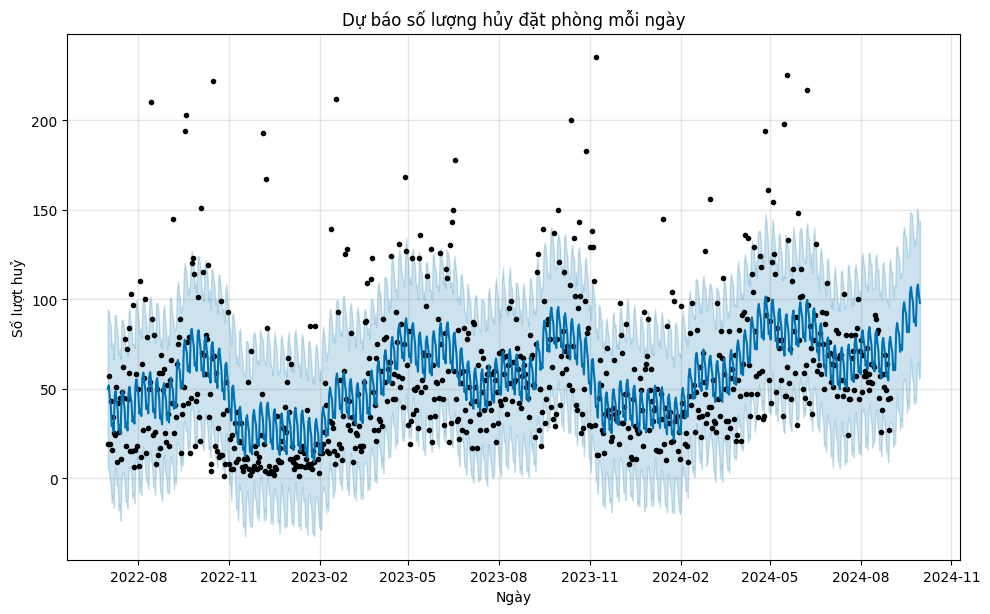

,ds,yhat,yhat_lower,yhat_upper
792,2024-09-01,73.905297,30.867800,114.616490
793,2024-09-02,70.744308,28.871957,115.450169
794,2024-09-03,60.346071,17.692748,101.122449
795,2024-09-04,63.623289,19.295810,107.733201
796,2024-09-05,60.371755,19.346508,106.569157
797,2024-09-06,82.459549,38.613386,128.514402
798,2024-09-07,86.692527,45.952935,129.909640
799,2024-09-08,82.595896,38.218156,124.336772
800,2024-09-09,80.243526,36.595593,122.771699
801,2024-09-10,70.542592,26.656360,111.780908


In [51]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

file_path = '/content/hotel_booking_2022_2024.csv'

data = pd.read_csv(file_path)

month_map = {
    'January':'01', 'February':'02', 'March':'03', 'April':'04',
    'May':'05', 'June':'06', 'July':'07', 'August':'08',
    'September':'09', 'October':'10', 'November':'11', 'December':'12'
}

data['arrival_date_month'] = data['arrival_date_month'].map(month_map)


data['arrival_date'] = pd.to_datetime(
    data['arrival_date_year'].astype(str) + '-' +
    data['arrival_date_month'].astype(str) + '-' +
    data['arrival_date_day_of_month'].astype(str),
    errors='coerce'
)


data = data.dropna(subset=['arrival_date', 'is_canceled'])

daily_cancellation = data.groupby('arrival_date')['is_canceled'].sum().reset_index()
daily_cancellation.columns = ['ds', 'y']

daily_cancellation = daily_cancellation.dropna()
daily_cancellation = daily_cancellation[daily_cancellation['y'] > 0]

model = Prophet()
model.fit(daily_cancellation)


future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)


fig1 = model.plot(forecast)
plt.title("Dự báo số lượng hủy đặt phòng mỗi ngày")
plt.xlabel("Ngày")
plt.ylabel("Số lượt huỷ")
plt.show()

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(30)

### ARIMA

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

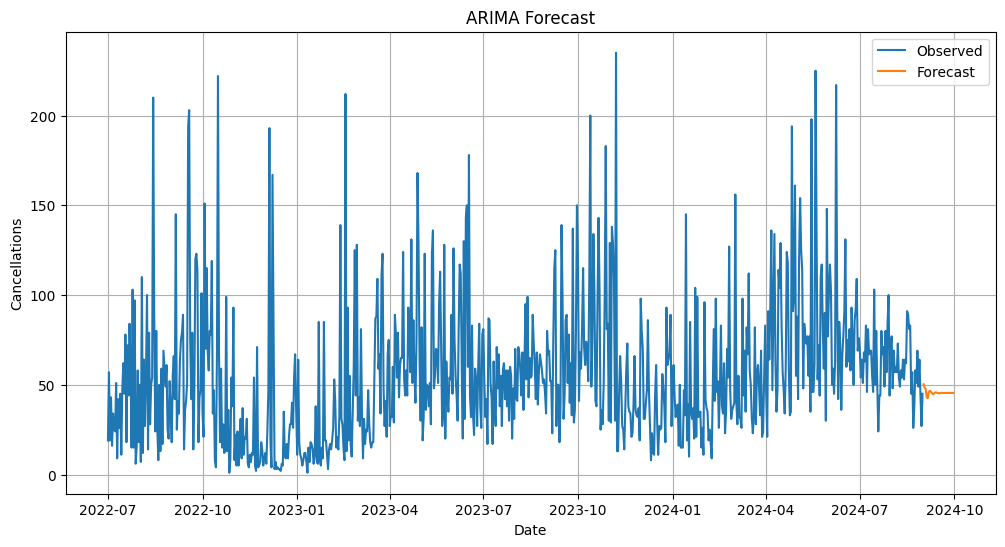

            ds       yhat  yhat_lower  yhat_upper
792 2024-09-01  50.277977  -23.428213  123.984166
793 2024-09-02  48.404281  -27.200583  124.009144
794 2024-09-03  47.740516  -29.248023  124.729054
795 2024-09-04  43.158288  -35.080321  121.396897
796 2024-09-05  42.489593  -37.548888  122.528074
797 2024-09-06  45.894268  -37.499746  129.288282
798 2024-09-07  46.675092  -41.607280  134.957464
799 2024-09-08  46.174264  -44.291301  136.639828
800 2024-09-09  45.478508  -46.960776  137.917792
801 2024-09-10  44.751870  -49.701129  139.204869
802 2024-09-11  45.033598  -51.702419  141.769614
803 2024-09-12  45.668164  -53.609021  144.945349
804 2024-09-13  45.742919  -55.983729  147.469568
805 2024-09-14  45.558853  -58.236842  149.354549
806 2024-09-15  45.362346  -60.443130  151.167822
807 2024-09-16  45.291446  -62.540229  153.123121
808 2024-09-17  45.409998  -64.490817  155.310813
809 2024-09-18  45.520168  -66.445269  157.485605
810 2024-09-19  45.509284  -68.446474  159.465042


In [52]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt


ts = daily_cancellation.set_index('ds')['y']

# Fit model
model = ARIMA(ts, order=(5,1,0))  # (p,d,q) có thể Grid Search để tối ưu
model_fit = model.fit()

forecast = model_fit.forecast(steps=30)

last_date = ts.index[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=30)

pred = model_fit.get_forecast(steps=30)
pred_df = pred.summary_frame()

plt.figure(figsize=(12, 6))
plt.plot(ts.index, ts.values, label='Observed')
plt.plot(future_dates, forecast, label='Forecast')
plt.title("ARIMA Forecast")
plt.xlabel("Date")
plt.ylabel("Cancellations")
plt.legend()
plt.grid(True)
plt.show()

forecast_df = pd.DataFrame({
    'ds': future_dates,
    'yhat': pred_df['mean'],
    'yhat_lower': pred_df['mean_ci_lower'],
    'yhat_upper': pred_df['mean_ci_upper']
})

print(forecast_df)

### LSTM

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


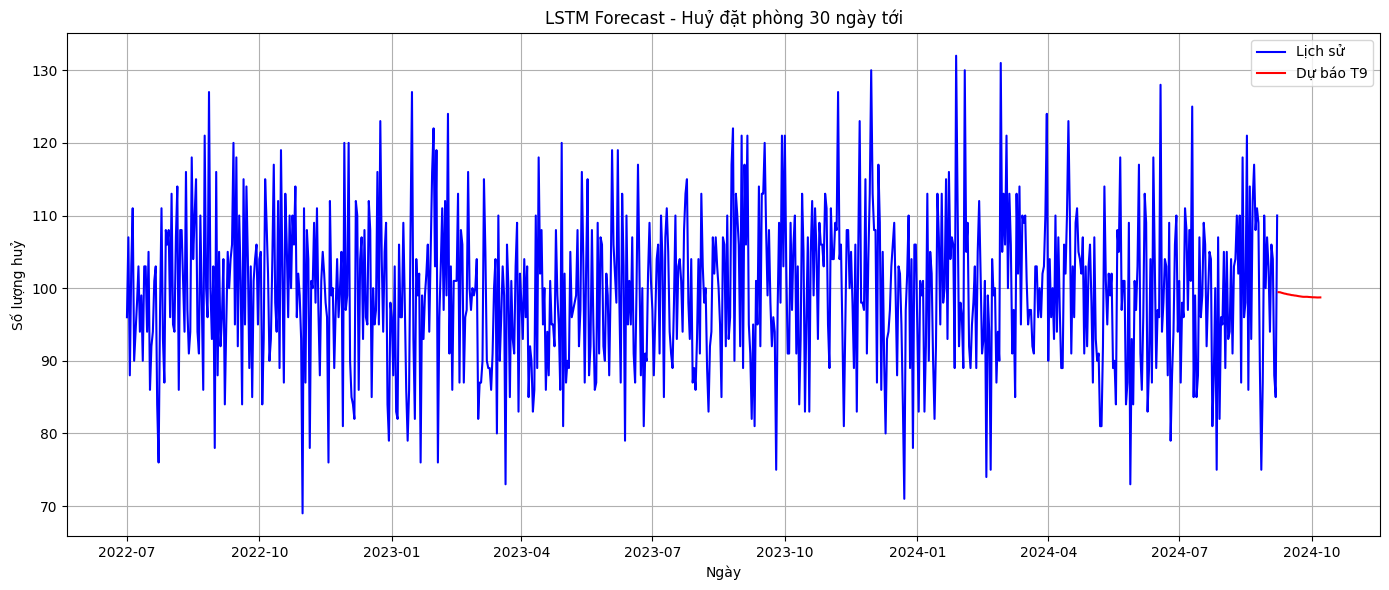

           ds       yhat
0  2024-09-08  99.446762
1  2024-09-09  99.438828
2  2024-09-10  99.372368
3  2024-09-11  99.316360
4  2024-09-12  99.257507
5  2024-09-13  99.223785
6  2024-09-14  99.166298
7  2024-09-15  99.133469
8  2024-09-16  99.099434
9  2024-09-17  99.047043
10 2024-09-18  99.030464
11 2024-09-19  98.990601
12 2024-09-20  98.971451
13 2024-09-21  98.935059
14 2024-09-22  98.896667
15 2024-09-23  98.868408
16 2024-09-24  98.837914
17 2024-09-25  98.811600
18 2024-09-26  98.806915
19 2024-09-27  98.811661
20 2024-09-28  98.808441
21 2024-09-29  98.785408
22 2024-09-30  98.773415
23 2024-10-01  98.755493
24 2024-10-02  98.743576
25 2024-10-03  98.740982
26 2024-10-04  98.727486
27 2024-10-05  98.716484
28 2024-10-06  98.720779
29 2024-10-07  98.726715
✅ File 'forecast_cancel_30days.csv' created.


In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

np.random.seed(42)
# date_range = pd.date_range(start='2015-07-01', end='2017-09-07')
date_range = pd.date_range(start='2022-07-01', end='2024-09-07')
data = {
    'ds': date_range,
    'y': np.random.poisson(lam=100, size=len(date_range))  # giả lập
}
df = pd.DataFrame(data)

scaler = MinMaxScaler()
scaled_y = scaler.fit_transform(df[['y']])

def create_sequences(data, window_size=30):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i + window_size])
        y.append(data[i + window_size])
    return np.array(X), np.array(y)

window_size = 30
X, y_seq = create_sequences(scaled_y, window_size)

X = X
y = y_seq

model = Sequential([
    LSTM(64, activation='relu', input_shape=(window_size, 1)),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')
model.fit(X, y, epochs=20, verbose=0)

future_preds = []
last_sequence = scaled_y[-window_size:]

for _ in range(30):
    input_seq = last_sequence.reshape(1, window_size, 1)
    pred = model.predict(input_seq, verbose=0)
    future_preds.append(pred[0, 0])
    last_sequence = np.append(last_sequence[1:], pred, axis=0)  # update window

future_preds_unscaled = scaler.inverse_transform(np.array(future_preds).reshape(-1, 1))

last_date = df['ds'].max()
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=30)

forecast_df = pd.DataFrame({
    'ds': future_dates,
    'yhat': future_preds_unscaled.flatten()
})

plt.figure(figsize=(14, 6))
plt.plot(df['ds'], df['y'], label='Lịch sử', color='blue')
plt.plot(forecast_df['ds'], forecast_df['yhat'], label='Dự báo T9', color='red')
plt.title("LSTM Forecast - Huỷ đặt phòng 30 ngày tới")
plt.xlabel("Ngày")
plt.ylabel("Số lượng huỷ")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print(forecast_df)

import pandas as pd
from datetime import datetime, timedelta
import numpy as np

# Giả sử bạn đã có list dự báo cancellations mỗi ngày:
today = datetime.today()
forecast_values = np.random.poisson(lam=150, size=30)  # random forecast

forecast_df = pd.DataFrame({
    'date': [today + timedelta(days=i) for i in range(30)],
    'forecast': forecast_values
})

forecast_df.to_csv('forecast_cancel_30days.csv', index=False)
print("✅ File 'forecast_cancel_30days.csv' created.")

## Optimization


### Feature Engineering & Chuẩn bị dữ liệu

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from scipy.optimize import linprog

file_path = '/content/hotel_booking_2022_2024.csv'

data = pd.read_csv(file_path)

data['reservation_status_date'] = pd.to_datetime(data['reservation_status_date'])

data['reservation_status_date'] = data['reservation_status_date'] + pd.DateOffset(years=7)

data['arrival_date_year'] = data['arrival_date_year'] + 7

# Encode đơn giản các cột phân loại cần thiết
le = LabelEncoder()
data['customer_type'] = le.fit_transform(data['customer_type'].astype(str))

print(le.classes_)

# Chọn vài feature đơn giản để demo (có thể mở rộng sau)
features = ['lead_time', 'adr', 'total_of_special_requests', 'customer_type']
data = data.dropna(subset=features + ['is_canceled'])
X = data[features]
y = data['is_canceled']

# 70 % for training, 30 % for validation

# X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y, train_size = 0.7, test_size = 0.15)
X_train.shape, y_train.shape, X_test.shape, y_test.shape


# Scale
std_scaler = StandardScaler()
std_scaler.fit(X_train)
X_train_std = std_scaler.transform(X_train)
X_test_std = std_scaler.transform(X_test)

mm_scaler = MinMaxScaler()
mm_scaler.fit(X_train)
X_train_mm = mm_scaler.transform(X_train)
X_test_mm = mm_scaler.transform(X_test)

### Train mô hình Logistic Regression để dự đoán xác suất huỷ

In [ ]:
#Logistic Regression

# model = LogisticRegression(max_iter=200)
# X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)
# model.fit(X_train, y_train)

# data['cancel_prob'] = model.predict_proba(X)[:, 1]
#=========================================================================================================================

# Construct Grid Parameters
lg_params = {
    'penalty': ['l1'],
    'C': [3.5],
    'max_iter': [300]
}

# Perform Grid Search
lg_gs = GridSearchCV(LogisticRegression(solver='liblinear', random_state=42), lg_params, cv = 5, scoring = 'accuracy')
lg = lg_gs.fit(X_train, y_train)

logreg = LogisticRegression(max_iter=500).fit(X_train_mm, y_train)

data['cancel_prob'] = logreg.predict_proba(X)[:, 1]

### Nhóm theo customer_type và tính trung bình xác suất

In [ ]:
grouped = data.groupby('customer_type').agg({
    'cancel_prob': 'mean',
    'is_canceled': 'count'
}).rename(columns={'is_canceled': 'num_bookings'})

grouped.reset_index(inplace=True)

# Giả định mỗi đơn vị ngân sách giảm được 10% xác suất huỷ
grouped['effectiveness'] = grouped['cancel_prob'] * grouped['num_bookings'] * 0.1

### Tối ưu phân bổ ngân sách để tối đa số lượng huỷ được giảm

In [ ]:
# Giả định tổng ngân sách là 100 đơn vị
budget = 100
n = len(grouped)

# Maximize effectiveness * allocation (linear program)
c = -grouped['effectiveness'].values  # dấu trừ vì scipy mặc định là minimize
A_eq = [[1] * n]
b_eq = [budget]
bounds = [(0, None)] * n  # ngân sách ≥ 0 cho mỗi nhóm

res = linprog(c, A_eq=A_eq, b_eq=b_eq, bounds=bounds, method='highs')

grouped['budget_allocated'] = res.x
grouped['estimated_cancellation_reduced'] = grouped['budget_allocated'] * 10  # giả định mỗi đơn vị giảm 10 huỷ

In [ ]:
pd.set_option('display.float_format', '{:.2f}'.format)
print(grouped[['customer_type', 'cancel_prob', 'num_bookings', 'budget_allocated', 'estimated_cancellation_reduced']])

import matplotlib.pyplot as plt

plt.bar(grouped['customer_type'], grouped['budget_allocated'])
plt.title('Phân bổ ngân sách theo customer_type')
plt.xlabel('Customer Type')
plt.ylabel('Ngân sách được cấp')
plt.grid(True)
plt.show()

In [ ]:
# Trước khi tối ưu: tổng số huỷ kỳ vọng
expected_cancel_before = (grouped['cancel_prob'] * grouped['num_bookings']).sum()

# Sau khi phân bổ ngân sách: giả định mỗi đơn vị ngân sách giảm được 10 huỷ (như trên)
expected_cancel_after = expected_cancel_before - grouped['estimated_cancellation_reduced'].sum()

print(f"Tổng số lượng huỷ kỳ vọng trước khi tối ưu: {expected_cancel_before:.2f}")
print(f"Tổng số lượng huỷ kỳ vọng sau khi tối ưu: {expected_cancel_after:.2f}")
print(f"Số lượng huỷ giảm được (ước tính): {expected_cancel_before - expected_cancel_after:.2f}")

### Phân tích

Từ bảng kết quả:

| customer_type       | cancel_prob | num_bookings | budget_allocated | estimated_cancellation_reduced |
|---------------------|-------------|---------------|-------------------|----------------------------------|
| 0 (Contract)       | 0.59        | 4,076         | 0.00              | 0.00                             |
| 1 (Group)        | 0.39        | 577           | 0.00              | 0.00                             |
| 2 (Transient) | 0.37        | 89,613        | 100.00            | 1000.00                          |
| 3 (Transient-Party)           | 0.35        | 25,124        | 0.00              | 0.00                             |

Phân tích kết quả tối ưu
- Hệ thống đã phân bổ toàn bộ ngân sách (100 đơn vị) cho nhóm customer_type = 2 (Transient).
- Mặc dù nhóm này không có cancel_prob cao nhất, nhưng:
- Sở hữu số lượng booking lớn nhất (89,613) → đóng góp phần lớn vào tổng lượt huỷ kỳ vọng.
- Vì vậy, ngân sách đem lại tác động lớn nhất tại đây.

Các nhóm như Group, Contract, Transient-Party không được phân bổ:
- Dù Contract có tỷ lệ huỷ cao (0.59), nhưng số lượng booking thấp ⇒ hiệu quả không bằng nhóm Transient.
- Group và Transient-Party có lượng booking thấp hơn hoặc tỷ lệ huỷ thấp hơn.

⸻

Kết luận
- Ngân sách được phân bổ thông minh: không dàn đều, mà dồn vào nơi có tiềm năng giảm huỷ lớn nhất.
- Nhóm customer_type = 2 là đòn bẩy chính để giảm lượng huỷ — nên được ưu tiên trong chiến dịch chăm sóc, khuyến mãi hoặc xác nhận booking.


# Model Deployment

In [72]:
import streamlit as st
import pandas as pd
import numpy as np
import pickle
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

# ---------------------- LOAD MODELS & DATA ----------------------
@st.cache_data
def load_model():
    return pickle.load(open('random_forest_model.pkl', 'rb'))

@st.cache_data
def load_forecast():
    df = pd.read_csv('forecast_cancel_30days.csv')
    df['date'] = pd.to_datetime(df['date'])
    return df

rf_model = load_model()
forecast_df = load_forecast()

# ---------------------- UI SETUP ----------------------
st.set_page_config(page_title="Smart Booking Manager", layout="wide")
st.title("\U0001F4CA Smart Booking Management Suite")
st.markdown("""
This dashboard integrates:
- **Classification**: Predict cancellation probability for individual bookings
- **Time Series**: Forecast cancellations for next 30 days
- **Optimization**: Recommend overbooking capacity to maximize occupancy
""")

# ---------------------- FORECAST SECTION ----------------------
st.header("\U0001F5D3 Forecast: Cancellations (Next 30 Days)")
fig, ax = plt.subplots()
ax.plot(forecast_df['date'], forecast_df['forecast'], marker='o')
ax.set_title("Forecast of Booking Cancellations")
ax.set_xlabel("Date")
ax.set_ylabel("Expected Cancellations")
st.pyplot(fig)

# ---------------------- BOOKING RISK PREDICTION ----------------------
st.header("\U0001F4DD Booking Risk Prediction")
with st.form("booking_form"):
    col1, col2, col3 = st.columns(3)
    with col1:
        lead_time = st.slider("Lead time (days)", 0, 365, 30)
        total_nights = st.slider("Stay duration (nights)", 1, 30, 2)
    with col2:
        adr = st.number_input("ADR ($)", value=120.0)
        room_type = st.selectbox("Room Type", ['A', 'B', 'C'])
    with col3:
        channel = st.selectbox("Booking Channel", ['Direct', 'TA/TO', 'Corporate'])
        cust_type = st.selectbox("Customer Type", ['Transient', 'Contract', 'Group'])
    submit = st.form_submit_button("Predict Risk")

if submit:
    mapping = {
        'booking_channel': {'Direct': 0, 'TA/TO': 1, 'Corporate': 2},
        'customer_type': {'Transient': 0, 'Contract': 1, 'Group': 2},
        'room_type': {'A': 0, 'B': 1, 'C': 2}
    }
    input_df = pd.DataFrame([{
        'lead_time': lead_time,
        'adr': adr,
        'booking_channel': mapping['booking_channel'][channel],
        'customer_type': mapping['customer_type'][cust_type],
        'room_type': mapping['room_type'][room_type],
        'total_nights': total_nights
    }])
    prob = rf_model.predict_proba(input_df)[0][1]
    st.metric("Cancellation Probability", f"{prob*100:.1f}%")
    if prob > 0.75:
        st.warning("High risk – suggest confirmation email or prepayment.")
    elif prob > 0.4:
        st.info("Medium risk – consider soft hold.")
    else:
        st.success("Low risk – accept normally.")

# ---------------------- OPTIMIZATION SECTION ----------------------
st.header("\U0001F4C6 Overbooking Optimization")
room_capacity = st.number_input("Room capacity per night", min_value=1, value=100)
opt_table = forecast_df.copy()
opt_table['overbooking_suggestion'] = (opt_table['forecast'] * 0.9).astype(int)
opt_table['total_to_accept'] = opt_table['overbooking_suggestion'] + room_capacity

st.dataframe(opt_table[['date', 'forecast', 'overbooking_suggestion', 'total_to_accept']].rename(columns={
    'forecast': 'Forecasted Cancellations',
    'overbooking_suggestion': 'Recommended Overbooking',
    'total_to_accept': 'Total Bookings to Accept'
}))

2025-06-29 10:07:08.960 No runtime found, using MemoryCacheStorageManager
2025-06-29 10:07:08.968 No runtime found, using MemoryCacheStorageManager
2025-06-29 10:07:08.969 No runtime found, using MemoryCacheStorageManager
2025-06-29 10:07:08.972 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-29 10:07:08.973 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-29 10:07:08.975 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-29 10:07:08.978 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-29 10:07:09.175 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-29 10:07:09.176 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-29 10:07:09.17

DeltaGenerator(_form_data=FormData(form_id='booking_form'))